# [Preprocessing]

*KU LeeDongGyu*

### Install Packages

In [1]:
pip install opencv-python # cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


### Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 # pip install opencv-python
import os
import sys
import matplotlib.pyplot as plt
import copy
from imp import reload
from PIL import Image #pip install image
import glob

## 1. Data Import
---

In [3]:
data = pd.read_csv('C:/Users/82104/Desktop/fer2013/fer2013.csv', header=0,index_col=None)
#data = np.loadtxt('C:/Users/82104/Desktop/fer2013/fer2013.csv',delimiter=',',dtype=np.str)
#data = np.genfromtxt('C:/Users/82104/Desktop/fer2013/fer2013.csv',delimiter=',',dtype=None)
print(data.head())


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


## 2. Data Summary
---

In [4]:
## 2.1 data split
## 0 : Anger , 1 : Disgust , 2 : Fear , 3 : Happiness , 4 : Sadness , 5 : Surprise , 6 : Neutral
names = {0:'Anger', 1:'Disgust', 2:'Fear', 3:'Happiness', 4:'Sadness', 5:'Surprise', 6:'Neutral'}

data_train = data.iloc[list(data['Usage']=='Training'),:] ; print(data_train.tail())
data_public_test = data.iloc[list(data['Usage']=='PublicTest'),:] ; print(data_public_test.tail())
data_private_test = data.iloc[list(data['Usage']=='PrivateTest'),:] ; print(data_private_test.tail())


       emotion                                             pixels     Usage
28704        2  84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...  Training
28705        0  114 112 113 113 111 111 112 113 115 113 114 11...  Training
28706        4  74 81 87 89 95 100 98 93 105 120 127 133 146 1...  Training
28707        0  222 227 203 90 86 90 84 77 94 87 99 119 134 14...  Training
28708        4  195 199 205 206 205 203 206 209 208 210 212 21...  Training
       emotion                                             pixels       Usage
32293        4  178 176 172 173 173 174 176 173 166 166 206 22...  PublicTest
32294        3  25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...  PublicTest
32295        4  255 255 255 255 255 255 255 255 255 255 255 25...  PublicTest
32296        4  33 25 31 36 36 42 69 103 132 163 175 183 187 1...  PublicTest
32297        4  61 63 59 75 151 159 166 161 143 170 127 131 18...  PublicTest
       emotion                                             pixels        Usa

In [5]:
## 2.2 the number of labels

### 2.2.1 total
y_total = data.iloc[:,0:1].values.flatten()
count_total = pd.value_counts(y_total, sort=True)
count_total = count_total.rename(index=names)
print(count_total) ; print("\nTotal:",sum(count_total))

Happiness    8989
Neutral      6198
Sadness      6077
Fear         5121
Anger        4953
Surprise     4002
Disgust       547
dtype: int64

Total: 35887


In [6]:
### 2.2.2 train
y_train = data_train.iloc[:,0:1].values.flatten()
count_train = pd.value_counts(y_train, sort=True)
count_train = count_train.rename(index=names)
print(count_train) ; print("\nTrain:",sum(count_train))

Happiness    7215
Neutral      4965
Sadness      4830
Fear         4097
Anger        3995
Surprise     3171
Disgust       436
dtype: int64

Train: 28709


In [7]:
### 2.2.3 private_test
y_private_test = data_private_test.iloc[:,0:1].values.flatten()
count_private_test = pd.value_counts(y_private_test, sort=True)
count_private_test = count_private_test.rename(index=names)
print(count_private_test) ; print("\nPrivate test:",sum(count_private_test))

Happiness    879
Neutral      626
Sadness      594
Fear         528
Anger        491
Surprise     416
Disgust       55
dtype: int64

Private test: 3589


In [8]:
### 2.2.4 public_test
y_public_test = data_public_test.iloc[:,0:1].values.flatten()
count_public_test = pd.value_counts(y_public_test, sort=True)
count_public_test = count_public_test.rename(index=names)
print(count_public_test) ; print("\nPublic test",sum(count_public_test))

Happiness    895
Sadness      653
Neutral      607
Fear         496
Anger        467
Surprise     415
Disgust       56
dtype: int64

Public test 3589


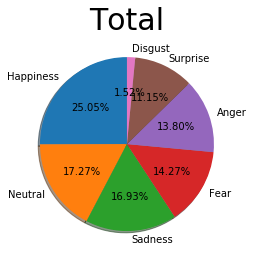

In [10]:
## 2.3 pie plot

### 2.3.1 total
labels_total = count_total.index
sizes_total = count_total.values
fig1, ax1 = plt.subplots()
ax1.pie(sizes_total, labels=labels_total, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.set_title('Total',fontsize=30)
plt.show()

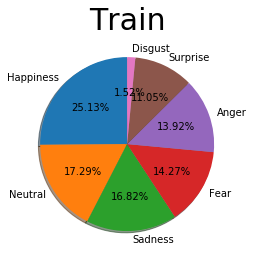

In [11]:
### 2.3.2 train
labels_train = count_train.index
sizes_train = count_train.values
fig2, ax2 = plt.subplots()
ax2.pie(sizes_train, labels=labels_train, autopct='%1.2f%%', shadow=True, startangle=90)
ax2.set_title('Train',fontsize=30)
plt.show()

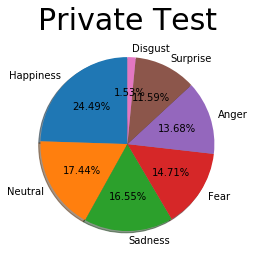

In [12]:
### 2.3.3 private_test
labels_private_test = count_private_test.index
sizes_private_test = count_private_test.values
fig3, ax3 = plt.subplots()
ax3.pie(sizes_private_test, labels=labels_private_test, autopct='%1.2f%%', shadow=True, startangle=90)
ax3.set_title('Private Test',fontsize=30)
plt.show()

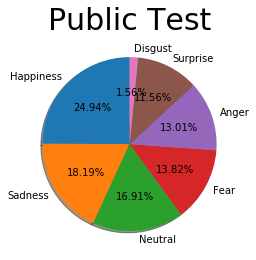

In [13]:
### 2.3.4 public_test
labels_public_test = count_public_test.index
sizes_public_test = count_public_test.values
fig4, ax4 = plt.subplots()
ax4.pie(sizes_public_test, labels=labels_public_test, autopct='%1.2f%%', shadow=True, startangle=90)
ax4.set_title('Public Test',fontsize=30)
plt.show()

## 3. Data Handling
---

In [9]:
# -*-coding: UTF-8 -*-
image_buffer =data['pixels']
images = np.array([np.fromstring(image, np.uint8, sep=' ') for image in image_buffer])

X_train = images[list(data['Usage']=='Training'),:].reshape(28709,48,48)
X_private_test = images[list(data['Usage']=='PrivateTest'),:].reshape(3589,48,48)
X_public_test = images[list(data['Usage']=='PublicTest'),:].reshape(3589,48,48)

print("the number of black pictures in training data :", sum(images[list(data['Usage']=='Training'),:].sum(axis=1) == 0) ) 
print("the number of black pictures in private test data :", sum(images[list(data['Usage']=='PrivateTest'),:].sum(axis=1) == 0 ) )
print('the number of black pictures in public test data :', sum(images[list(data['Usage']=='PublicTest'),:].sum(axis=1) == 0 ) ) 


the number of black pictures in training data : 11
the number of black pictures in private test data : 0
the number of black pictures in public test data : 1


In [10]:
# finally, you can check the real dataset you will use below.
data = data.drop(np.where(images.sum(axis=1)==0 )[0])
y = data['emotion']
X = np.delete(images, np.where(images.sum(axis=1)==0 )[0] , axis=0 ).reshape(-1,48,48)

In [11]:
ex =X.reshape(-1,48,48,1)

In [12]:
ch_1 = copy.deepcopy(ex)
ch_2 = copy.deepcopy(ex)

In [13]:
temp = np.append(ex,ch_1,axis=3)
X = np.append(temp,ch_2,axis=3)

In [14]:
X.shape

(35875, 48, 48, 3)

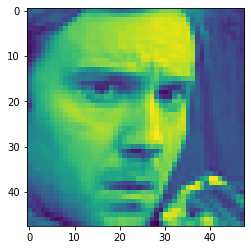

In [15]:
plt.imshow(images[0].reshape(48,48)) # rgb depth가 1일 때 

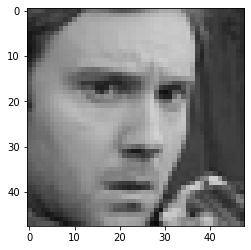

In [16]:
plt.imshow(X[0]) # rgb depth가 3일 때

In [17]:
X_train = X[list(data['Usage']=='Training'),:]
X_private_test = X[list(data['Usage']=='PrivateTest'),:]
X_public_test = X[list(data['Usage']=='PublicTest'),:]

y_train = y[list(data['Usage']=='Training')]
y_private_test = y[list(data['Usage']=='PrivateTest')]
y_public_test = y[list(data['Usage']=='PublicTest')]

In [18]:
print("X_train.shape:",X_train.shape) 
print("X_private_test.shape:",X_private_test.shape)
print("X_public_test.shape:",X_public_test.shape)

X_train.shape: (28698, 48, 48, 3)
X_private_test.shape: (3589, 48, 48, 3)
X_public_test.shape: (3588, 48, 48, 3)


## 4. Data Save
---

In [19]:
os.getcwd()
os.chdir("C:\\Users\\82104\\Desktop\\fer2013\\mydata")

In [20]:
X_train_save = X_train.reshape(-1,48*48*3)
X_private_test_save = X_private_test.reshape(-1,48*48*3)
X_public_test_save = X_public_test.reshape(-1,48*48*3)

In [21]:
X_train_save = pd.DataFrame(X_train_save)
X_private_test_save = pd.DataFrame(X_private_test_save)
X_public_test_save = pd.DataFrame(X_public_test_save)

In [22]:
y_train_save = pd.DataFrame(y_train)
y_private_test_save = pd.DataFrame(y_private_test)
y_public_test_save = pd.DataFrame(y_public_test)

In [23]:
# save
X_train_save.to_csv("X_train.csv")
X_private_test_save.to_csv("X_private_test.csv")
X_public_test_save.to_csv("X_public_test.csv")
y_train_save.to_csv("y_train.csv")
y_private_test_save.to_csv("y_private_test.csv")
y_public_test_save.to_csv("y_public_test.csv")

## 5. Image Showing & Handling
---

In [23]:
data = np.loadtxt('C:/Users/82104/Desktop/fer2013/fer2013.csv',delimiter=',',dtype=np.str)

In [24]:
## 5.1 image converting

usage = data[1:,2] # 안되면, usage = data.iloc[:,0:1].values.flatten()
dataset = zip(images, usage) # the 'images' variable is in [3. data handling]
for i, d in enumerate(dataset):
    img = d[0].reshape((48,48))
    img_name = '%08d.jpg' %i
    img_path = os.path.join('C:/Users/82104/Desktop/fer2013/all_images', img_name)
    cv2.imwrite(img_path, img)

In [18]:
## 5.2 48 X 48 images with 5 examples
img1=cv2.imread("C:/Users/82104/Desktop/fer2013/all_images/00000001.jpg")
img2=cv2.imread("C:/Users/82104/Desktop/fer2013/all_images/00000300.jpg")
img3=cv2.imread("C:/Users/82104/Desktop/fer2013/all_images/00000003.jpg")
img4=cv2.imread("C:/Users/82104/Desktop/fer2013/all_images/00000008.jpg")
img5=cv2.imread("C:/Users/82104/Desktop/fer2013/all_images/00000004.jpg")
img6=cv2.imread("C:/Users/82104/Desktop/fer2013/all_images/00000016.jpg")
img7=cv2.imread("C:/Users/82104/Desktop/fer2013/all_images/00000012.jpg")

(-0.5, 47.5, 47.5, -0.5)

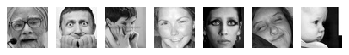

In [19]:
plt.subplot(1, 7, 1) ; plt.imshow(img1) ; plt.axis('off')
plt.subplot(1, 7, 2) ; plt.imshow(img2) ; plt.axis('off')
plt.subplot(1, 7, 3) ; plt.imshow(img3) ; plt.axis('off')
plt.subplot(1, 7, 4) ; plt.imshow(img4) ; plt.axis('off')
plt.subplot(1, 7, 5) ; plt.imshow(img5) ; plt.axis('off')
plt.subplot(1, 7, 6) ; plt.imshow(img6) ; plt.axis('off')
plt.subplot(1, 7, 7) ; plt.imshow(img7) ; plt.axis('off')

In [20]:
## 5.3 256 X 256 images with 5 examples
zoom1 = cv2.resize(img1, (256, 256), interpolation=cv2.INTER_CUBIC)
zoom2 = cv2.resize(img2, (256, 256), interpolation=cv2.INTER_CUBIC)
zoom3 = cv2.resize(img3, (256, 256), interpolation=cv2.INTER_CUBIC)
zoom4 = cv2.resize(img4, (256, 256), interpolation=cv2.INTER_CUBIC)
zoom5 = cv2.resize(img5, (256, 256), interpolation=cv2.INTER_CUBIC)
zoom6 = cv2.resize(img6, (256, 256), interpolation=cv2.INTER_CUBIC)
zoom7 = cv2.resize(img7, (256, 256), interpolation=cv2.INTER_CUBIC)


(-0.5, 255.5, 255.5, -0.5)

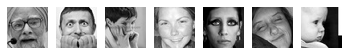

In [21]:
#size up

plt.subplot(1, 7, 1) ; plt.imshow(zoom1) ; plt.axis('off')
plt.subplot(1, 7, 2) ; plt.imshow(zoom2) ; plt.axis('off')
plt.subplot(1, 7, 3) ; plt.imshow(zoom3) ; plt.axis('off')
plt.subplot(1, 7, 4) ; plt.imshow(zoom4) ; plt.axis('off')
plt.subplot(1, 7, 5) ; plt.imshow(zoom5) ; plt.axis('off')
plt.subplot(1, 7, 6) ; plt.imshow(zoom6) ; plt.axis('off')
plt.subplot(1, 7, 7) ; plt.imshow(zoom7) ; plt.axis('off')